# 1.1 - Regresion Lineal (ing. carac.)

**Ecuacion de la recta**

$$y = m·x+b$$

In [1]:
import pandas as pd
import numpy as np
import pylab as plt

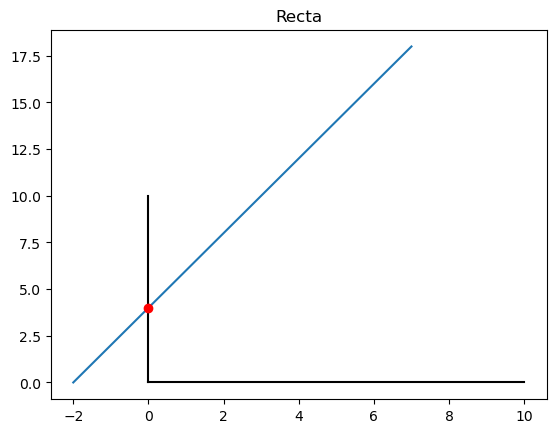

In [3]:
x=[i for i in range(-2, 8)]

m=2
b=4

y=[m*x+b for x in x] #Ecuacion general de la recta

plt.plot(x, y)
plt.plot([0,0], [0,10], color='black') #Ejes
plt.plot([0,10], [0,0], color='black') #Ejes
plt.plot(0, b, 'ro') #Punto de corte con el eje y
plt.title('Recta');

**Generalizacion de la ecuacion de la recta**

$$y=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3+\ldots+\beta_nx_n$$

El objetivo de la regresion lineal es obtener los $\beta$:
+ Algebraicamente: $\beta = (X^{T}X)^{-1}X^{T}Y$
+ Minimos cuadrados

In [4]:
from scipy.stats import linregress

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [6]:
auto=pd.read_csv('data/auto-mpg.csv') #Cargamos un dataset de coches

auto.head()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


In [9]:
# y=mx+b(ecuacion gral de la recta)
# mpg(millas por galon) = m * acceleration + b vamos a calcular m y b para ver que relacion hay entre la aceleracion y el consumo de gasolina (apróximadamente)


x = auto.acceleration # variable independiente

y = auto.mpg # variable dependiente

linreg = linregress(x, y) #Calculamos la regresion lineal, la recta de mejor ajuste para todos los puntos

linreg

# lo que dice es que las millas por galon son igual a 1.2 veces la aceleracion mas 5 aprox

# pendiente=m, ordenada en el origen=b, coeficiente de determinacion, p_valor,  error estandar)

LinregressResult(slope=1.1912045293502274, intercept=4.9697930042539085, rvalue=0.4202889121016507, pvalue=1.8230915350787203e-18, stderr=0.12923643283101396, intercept_stderr=2.043207897761682)

In [12]:
R2 = linreg[2]**2 #Coeficiente de determinacion (es el cuadrado del coeficiente de correlacion)

R2 #R2 es una metrica que nos dice que tan bien se ajusta la recta a los datos, entre mas cercano a 1 mejor. 

0.17664276963558906

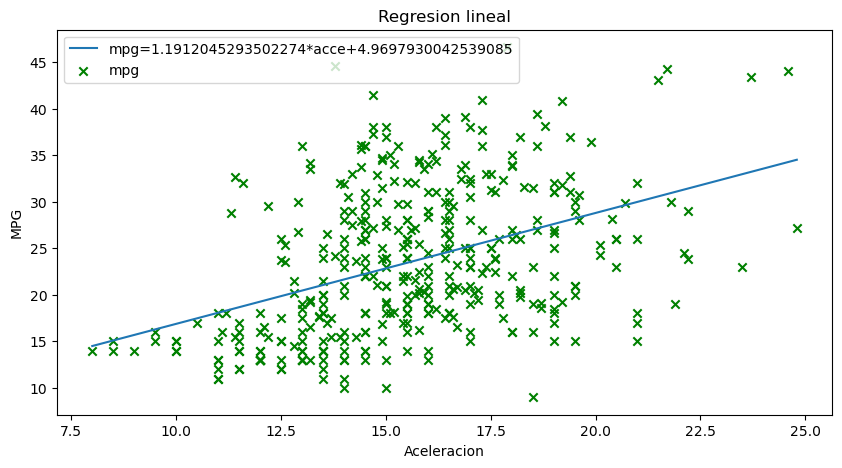

In [13]:
# Vamos a pintar la recta de mejor ajuste

x = np.linspace(auto.acceleration.min(), auto.acceleration.max(), 50) #Generamos 50 puntos entre el minimo y el maximo de la aceleracion

y = linreg[0]*x + linreg[1] #Calculamos los valores de y para cada uno de los 50 puntos

plt.figure(figsize=(10, 5)) #Tamaño de la figura
plt.plot(x, y, label='mpg={}*acce+{}'.format(linreg[0], linreg[1])) #Pintamos la recta de mejor ajuste
plt.scatter(auto.acceleration, auto.mpg, marker='x', c='g', label='mpg') #Pintamos los puntos, como nos gusta un scatterplot

plt.title('Regresion lineal')
plt.xlabel('Aceleracion')
plt.ylabel('MPG')
plt.legend()
plt.show();

In [14]:
# Podemos usar statsmodels para calcular la regresion lineal

import warnings
warnings.simplefilter('ignore') #Para que no nos salgan warnings, nos sirve para el warning que vimos en la DEMO del lunes por ejemplo


x = sm.add_constant(auto.acceleration) #sm es statsmodels, add_constant es para añadir una constante a la regresion lineal, en este caso el termino independiente

y = auto.mpg # variable dependiente

modelo = sm.OLS(y, x).fit() #OLS es Ordinary Least Squares, es decir, minimos cuadrados ordinarios, es el metodo que usa statsmodels para calcular la regresion lineal

Enhorabuena acabas de hacer tu primer modelo de regresion lineal. 😎😎😎
![](https://i.kym-cdn.com/entries/icons/facebook/000/021/807/ig9OoyenpxqdCQyABmOQBZDI0duHk2QZZmWg2Hxd4ro.jpg)

In [15]:
modelo.summary() #Nos da un resumen de la regresion lineal

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     84.96
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           1.82e-18
Time:                        02:07:28   Log-Likelihood:                -1343.9
No. Observations:                 398   AIC:                             2692.
Df Residuals:                     396   BIC:                             2700.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.9698      2.043      2.432      0.015       0.953       8.987
acceleration     1.1912      0.129      9.217      0.000       0.937       1.445
==============================================================================
Omnibus:                       17.459   Durbin-Watson:                   0.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.214
Skew:                           0.497   Prob(JB):                     0.000111
Kurtosis:                       2.670   Cond. No.                         91.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Que es lo más importante que nos da el summary() de este modelo:
+ R-squared: 0.177 (17.7% de la variabilidad de la variable dependiente es explicada por el modelo)
+ P >|t| Esto es el P-valor, si es menor que 0.05 es que la variable es significativa para el modelo, es decir que la variable tiene un efecto sobre la variable dependiente. Cuanto más pequeño sea el P-valor más significativa es la variable.

In [17]:
pred = modelo.predict(x) #Ahora vamos a predecir, es decir, vamos a calcular los valores de y para cada uno de los puntos de x.

pred[:10] # ahora predigo, es decir, dame la aceleracion del coche y te digo mas menos lo que consume

0    19.264247
1    18.668645
2    18.073043
3    19.264247
4    17.477441
5    16.881838
6    15.690634
7    15.095032
8    16.881838
9    15.095032
dtype: float64

In [18]:
y[:10] #Estos son los valores reales que tomaba y en nuestros datos

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
5    15.0
6    14.0
7    14.0
8    14.0
9    15.0
Name: mpg, dtype: float64

In [24]:
# Vamos a meter estas 2 columnas en un df para poder compararlas por pares a ver que tal lo hace nuestro modelo

pred_df = pd.DataFrame({'pred':pred, 'y':y})
pred_df.head(12)


,pred,y
0,19.264247,18.0
1,18.668645,15.0
2,18.073043,18.0
3,19.264247,16.0
4,17.477441,17.0
5,16.881838,15.0
6,15.690634,14.0
7,15.095032,14.0
8,16.881838,14.0
9,15.095032,15.0


In [25]:
#Vamos a meter una nueva columna que recoja la diferencia entre los valores reales y los predichos por nuestro modelo
pred_df['diff'] = pred_df['y'] - pred_df['pred']
pred_df.head(12)

,pred,y,diff
0,19.264247,18.0,-1.264247
1,18.668645,15.0,-3.668645
2,18.073043,18.0,-0.073043
3,19.264247,16.0,-3.264247
4,17.477441,17.0,-0.477441
5,16.881838,15.0,-1.881838
6,15.690634,14.0,-1.690634
7,15.095032,14.0,-1.095032
8,16.881838,14.0,-2.881838
9,15.095032,15.0,-0.095032


In [30]:
pred_df['diff'].mean() #Ni tan mal

7.426778343623158e-15

In [31]:
# Varias variables, vamos a ver si podemos meter mas variables para mejorar el modelo y que nuestro consumo no dependa solo de la aceleracion

x = sm.add_constant(auto[[
    'acceleration',
    'cylinders',
    'weight',
    'horse_power',
    'model_year',
    'displacement'
]].apply(lambda x: x.fillna(x.mean())) #Rellenamos los valores nulos con la media de cada columna

)

y=auto.mpg

modelo=sm.OLS(y, x).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     275.5
Date:                Tue, 20 Jun 2023   Prob (F-statistic):          4.76e-137
Time:                        02:25:12   Log-Likelihood:                -1053.5
No. Observations:                 398   AIC:                             2121.
Df Residuals:                     391   BIC:                             2149.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -14.9731      4.690     -3.193      0.002     -24.194      -5.752
acceleration     0.0915      0.099      0.922      0.357      -0.104       0.287
cylinders       -0.2524      0.331     -0.763      0.446      -0.903       0.398
weight          -0.0070      0.001    -10.577      0.000      -0.008      -0.006
horse_power      0.0024      0.013      0.184      0.854      -0.024       0.029
model_year       0.7573      0.052     14.551      0.000       0.655       0.860
displacement     0.0069      0.007      0.944      0.346      -0.008       0.021
==============================================================================
Omnibus:                       36.885   Durbin-Watson:                   1.216
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.053
Skew:                           0.621   Prob(JB):                     4.08e-13
Kurtosis:                       4.378   Cond. No.                     8.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
modelo.params #Estos son los coeficientes de la regresion lineal, es decir, la pendiente de cada una de las variables y la ordenada en el origen. Esas distintas betas que teniamos en la ecuacion general de la recta

const          -14.973101
acceleration     0.091488
cylinders       -0.252358
weight          -0.006977
horse_power      0.002442
model_year       0.757347
displacement     0.006949
dtype: float64

In [34]:
# Podemos tirar de sklearn para hacer lo mismo / Sklearn es una libreria de machine learning muy conocida, la cual incluye muchos modelos ademas de la reg. lineal

!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 9.3 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 10.8 MB/s eta 0:00:00


In [35]:
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.metrics import r2_score as r2

In [36]:
auto=auto.dropna()

x=auto[[
    #'acceleration',
    #'cylinders',
    'weight',
    #'horse_power',
    'model_year',
    #'displacement'
]]


y=auto.mpg

In [39]:
modelo = LinReg(fit_intercept=True).fit(x, y) #fit_intercept=True es para que calcule la ordenada en el origen. Si no se lo ponemos, la ordenada en el origen es 0


modelo

LinearRegression()

In [41]:
modelo.coef_ #Estos son los coeficientes de la regresion lineal, es decir, la pendiente de cada una de las variables y la ordenada en el origen. Esas distintas betas que teniamos en la ecuacion general de la recta

array([-0.00663208,  0.75731828])

In [42]:
modelo.intercept_

-14.347253017615866

In [43]:
pred=modelo.predict(x)

pred[:10]

array([15.42623483, 14.1727726 , 15.87721595, 15.89711217, 15.79099897,
        9.87518781,  9.78897083, 10.06751799,  9.31809348, 13.13153678])

In [45]:
r2(y, pred) #Coeficiente de determinacion, es decir, que tan bien se ajusta la recta a los datos. REcordad que es el cuadrado del coeficiente de correlacion y que cuanto mas cercano a 1 mejor

0.8081803058793997

In [47]:
x_new = np.array([3211, 89]) #Vamos a predecir el consumo de un coche con 3211 libras de peso y del año 89

In [48]:
modelo.predict(x_new.reshape(1, -1)) #Le tenemos que pasar un array de 2 dimensiones, por eso el reshape

array([31.75848023])

In [45]:
-0.00663208*3211 +  0.75731828*89 - 14.347253017615852

31.758465022384147

In [46]:
x_new.shape

(2,)

In [47]:
x_new.reshape(1, -1).shape

(1, 2)